In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

MAX = 256

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()

def binarify(image, condition):
    result = np.zeros(image.shape)
    height, width = image.shape
    for i in range(0, height):
        for j in range(0, width):
            result[i][j] = condition(image[i][j]) * 255
            
    return result



1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

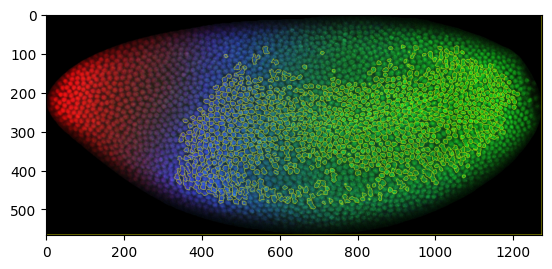

In [26]:
img1 = cv2.imread("image.jpg")
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_inv = 255 - img1_gray 

# ret, thresh = cv2.threshold(img1_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

ret, thresh = (80, np.array(img1_gray))

thresh[thresh > ret] = WHITE
thresh[thresh <= ret] = BLACK

# print(ret)
# showImage(thresh)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img1, markers)
img1[markers == -1] = [255,255,0]

showImage(img1)

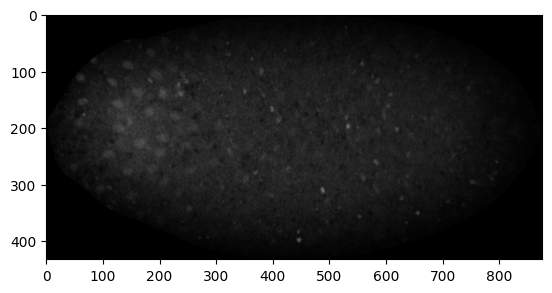

In [18]:
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

50


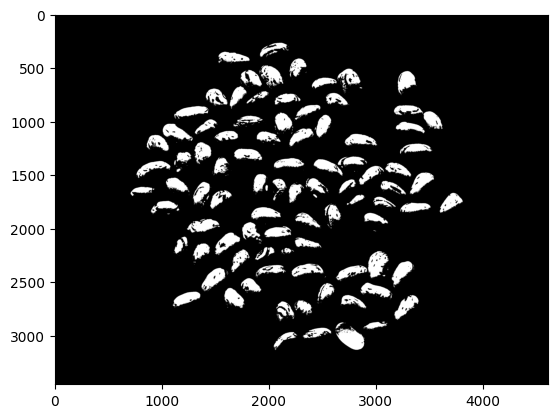

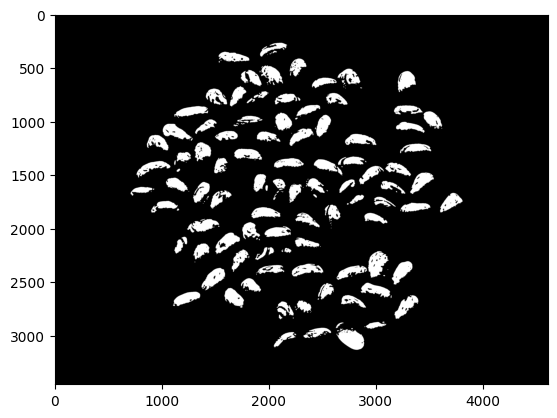

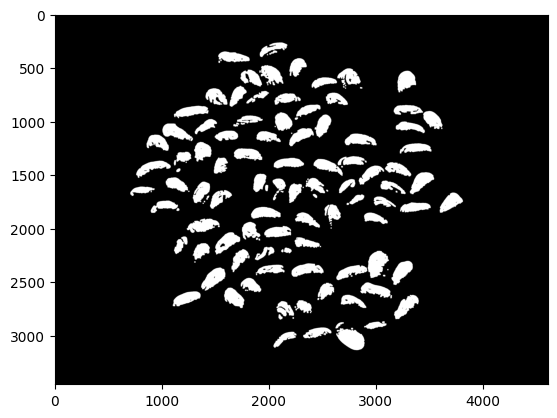

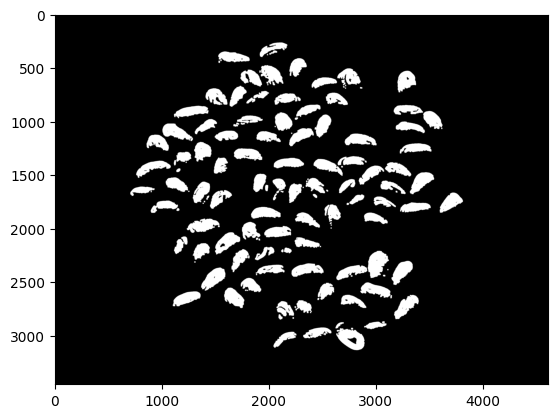

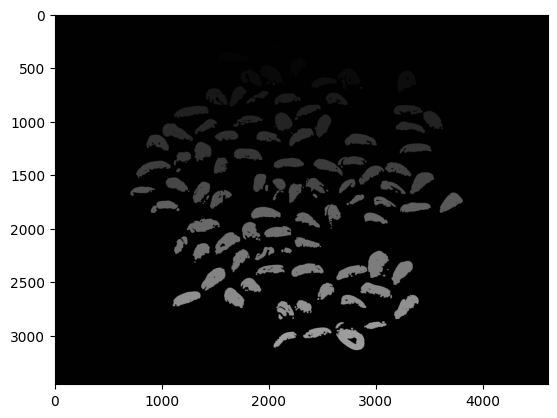

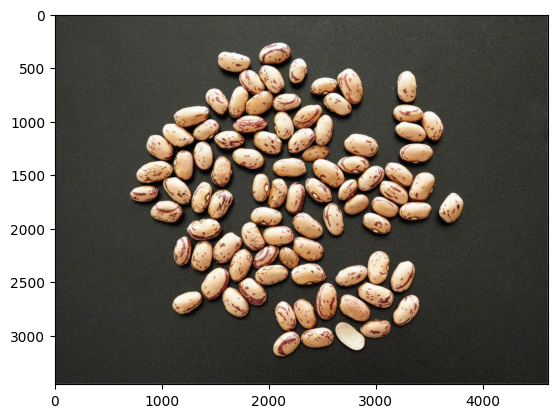

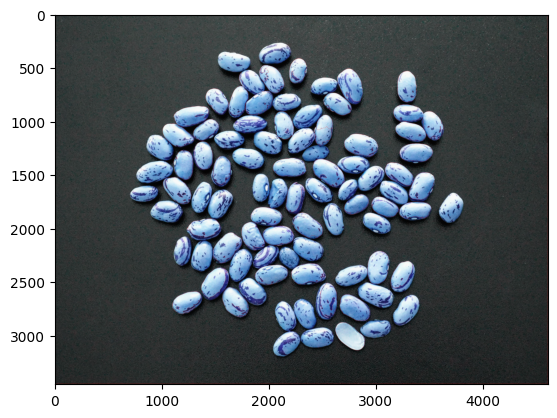

In [57]:
img3 = cv2.imread("feijao.jpg")
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img3_inv = 255 - img3_gray 

# ret, thresh = cv2.threshold(img1_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

ret, thresh = (50, np.array(img3_inv))

thresh[thresh > ret] = WHITE
thresh[thresh <= ret] = BLACK
thresh = 255 - thresh

print(ret)
showImage(thresh)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(unknown)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
# markers[unknown==255] = 0

showImage(opening)
showImage(sure_bg)
showImage(unknown)
showImage(markers)

markers = cv2.watershed(img3_rgb, markers)
img3_rgb[markers == -1] = [255,255,255]

showImage(img3_rgb)